In [7]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pylab as plt


In [8]:
#plt.style.use('seaborn-pastel')

### Reading a File

This is an example on how to read a text file where each line gives us a content

In [9]:
file = open("../../Lab data 2016/quartzsignal_his.dat")
x = [] 
i = 0
lines = file.readlines()

#print lines
for line in lines:
    line = line.replace('\r\n','')
    line = line.replace('\t','')
    try:
        data = int(line.replace('\n', ''))
        for j in range(data):
            x.append(i)
        i+=1
    except ValueError as e:
        print e
        print r"Line number %i: \"%s\" cannot be converted to float" %(i,line)
        
file.close()

invalid literal for int() with base 10: ''
Line number 1000: \"\" cannot be converted to float


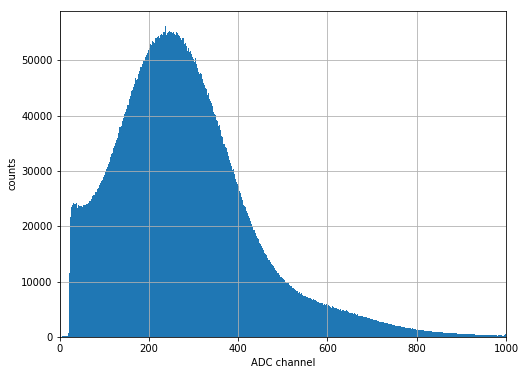

In [10]:
x = np.array(x)
fig, ax = plt.subplots(figsize=(8,6))
plt.grid()
ax.hist(x,bins = np.arange(0,1000,1))
ax.set_xlabel("ADC channel")
ax.set_ylabel("counts")
ax.set_xlim(0,1000)
plt.show()

## Monte Carlo simulation
### Hit and Miss (exponential)

On va utilizé le metode de hit and miss pour generer une distribution de données exponential.


In [103]:
exp_decay = lambda x, A, t, y0: A * np.exp(-x / t) + y0

In [102]:
t = 200.
A = 1/t 
y0 = 0.

xmax = 1200
mc_events = 10000

First we are going to use a method à la C, ie with loops etc. Then we will see the more pythonic way

In [111]:
data1 = []
for i in range(0, mc_events):
    rnd1 = np.random.rand()
    rnd2 = np.random.rand()
    y = A*rnd1
    x = xmax*rnd2
    if y < exp_decay(x, A, t, y0):
        data1.append(x)
        


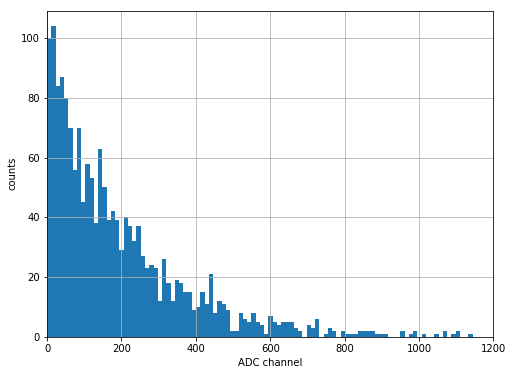

In [112]:
fig1, ax1 = plt.subplots(figsize=(8,6))
plt.grid()
ax1.hist(data1,bins = 100)
ax1.set_xlabel("ADC channel")
ax1.set_ylabel("counts")
ax1.set_xlim(0,1200)
plt.show()

Now let's try the more pythonic way

In [169]:
rnd1 = np.random.rand(mc_events)
rnd2 = np.random.rand(mc_events)
y = A*rnd1
x = xmax*rnd2
yprime = exp_decay(x, A, t, y0)

print rnd1[0].shape
data2 = x[np.where(y < yprime)]

()


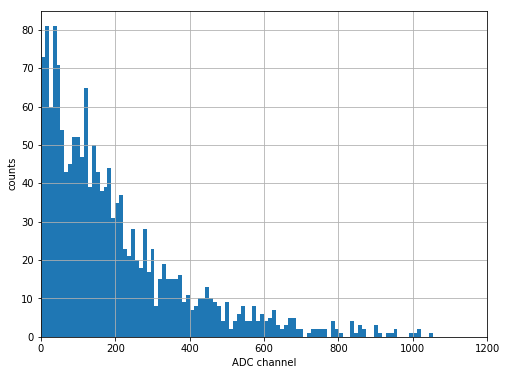

In [114]:
fig2, ax2 = plt.subplots(figsize=(8,6))
plt.grid()
ax2.hist(data2,bins = 100)
ax2.set_xlabel("ADC channel")
ax2.set_ylabel("counts")
ax2.set_xlim(0,1200)
plt.show()

In [156]:
tmin = 100.
tmax = 300.
L = []

tt = np.arange(tmin, tmax, 1.)

for t in tt:
    P = exp_decay(data2,1/t,t,0)
    print data2.shape
    L.append(np.sum(-np.log(P)))
    
print tt[np.where(L == np.min(L))]

(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)
(1592,)


In [151]:
print np.sum(np.log(exp_decay(data2, 1/t, t, 0)))

-10133.3448696


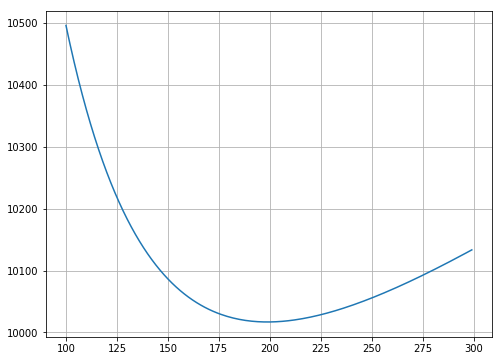

In [136]:
x = np.array(x)
fig, ax = plt.subplots(figsize=(8,6))
plt.grid()
ax.plot(tt, L)